# Kaggle Competition: Customer Churn Prediction

## Predict the propensity of customers to switch provider for Orange

In [1]:
#import all necessary packages
import pandas as pd
import numpy as np
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFECV
from matplotlib import pyplot
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats            import pearsonr
from sklearn.metrics import recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import lightgbm
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

from skopt import BayesSearchCV

In [2]:
#import training set
train = pd.read_csv("orange_churn_train.csv")

In [3]:
train.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,churn
0,3,NaN,NaN,NaN,NaN,NaN,1351.0,7.0,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,ELof,7P5s,ZI9m,NoEd,mj86,NaN,0
1,4,NaN,NaN,NaN,NaN,NaN,644.0,0.0,NaN,NaN,...,76DJixu,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,2583.0,0.0,NaN,NaN,...,I5dzv5f,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,1
3,8,NaN,NaN,NaN,NaN,NaN,1463.0,7.0,NaN,NaN,...,xwyAw04,LM8l689qOp,NaN,kG3k,fKCe,RAYp,F2FyR07IdsN7I,mj86,NaN,0
4,9,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,...,76DJixu,NaN,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN,0


In [4]:
#check for total number of missing
train.isna().sum().sum()

1604602

In [5]:
#drop all columns with a total number of missing values superior to 30%
for i in train.columns:
    train = train.dropna(thresh=0.66*len(train), axis=1)

In [6]:
train_col = train.columns

In [7]:
#check for total number of missing
train.isna().sum().sum()

43666

In [8]:
#check for new number of columns
train.head()

,cust_id,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,...,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,churn
0,3,1351.0,7.0,120.0,64.0,80.0,10.0,24.0,200.00,0.0,...,cJvF,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,7P5s,ZI9m,NoEd,0
1,4,644.0,0.0,0.0,148.0,185.0,0.0,40.0,186.64,0.0,...,cJvF,FzaX,7OmVzos,oslk,76DJixu,LM8l689qOp,7P5s,RAYp,F2FyR07IdsN7I,0
2,7,2583.0,0.0,0.0,984.0,1230.0,42.0,152.0,356.64,5.0,...,UYBR,FzaX,meWR98m,oslk,I5dzv5f,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,1
3,8,1463.0,7.0,5068.0,276.0,345.0,12.0,288.0,166.56,0.0,...,UYBR,FzaX,ie2oOXS,oslk,xwyAw04,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,0
4,9,77.0,0.0,0.0,24.0,30.0,0.0,8.0,278.96,5.0,...,cJvF,NaN,7OmVzos,oslk,76DJixu,NaN,7P5s,RAYp,F2FyR07IdsN7I,0


In [9]:
#check data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 69 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  10000 non-null  int64  
 1   Var6     8913 non-null   float64
 2   Var7     8911 non-null   float64
 3   Var13    8911 non-null   float64
 4   Var21    8913 non-null   float64
 5   Var22    9019 non-null   float64
 6   Var24    8556 non-null   float64
 7   Var25    9019 non-null   float64
 8   Var28    9019 non-null   float64
 9   Var35    9019 non-null   float64
 10  Var38    9019 non-null   float64
 11  Var44    9019 non-null   float64
 12  Var57    10000 non-null  float64
 13  Var65    8911 non-null   float64
 14  Var73    10000 non-null  int64  
 15  Var74    8911 non-null   float64
 16  Var76    9019 non-null   float64
 17  Var78    9019 non-null   float64
 18  Var81    8913 non-null   float64
 19  Var83    9019 non-null   float64
 20  Var85    9019 non-null   float64
 21  Var109   8556

In [10]:
train.head()

,cust_id,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,...,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,churn
0,3,1351.0,7.0,120.0,64.0,80.0,10.0,24.0,200.00,0.0,...,cJvF,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,7P5s,ZI9m,NoEd,0
1,4,644.0,0.0,0.0,148.0,185.0,0.0,40.0,186.64,0.0,...,cJvF,FzaX,7OmVzos,oslk,76DJixu,LM8l689qOp,7P5s,RAYp,F2FyR07IdsN7I,0
2,7,2583.0,0.0,0.0,984.0,1230.0,42.0,152.0,356.64,5.0,...,UYBR,FzaX,meWR98m,oslk,I5dzv5f,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,1
3,8,1463.0,7.0,5068.0,276.0,345.0,12.0,288.0,166.56,0.0,...,UYBR,FzaX,ie2oOXS,oslk,xwyAw04,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,0
4,9,77.0,0.0,0.0,24.0,30.0,0.0,8.0,278.96,5.0,...,cJvF,NaN,7OmVzos,oslk,76DJixu,NaN,7P5s,RAYp,F2FyR07IdsN7I,0


In [11]:
train.Var221.unique()

array(['zCkv', 'oslk', 'd0EEeJi', 'QKW8DRm', 'Al6ZaUT', 'z4pH', 'JIiEFBU'],
      dtype=object)

In [12]:
train_iv_list = train.columns[:-1]
train_dv_list = train.columns[-1]

train.Var73 = train.Var73.astype('float64')

train_cat_list = [v for v in train_iv_list if train[v].dtypes == object]
train_num_list = [v for v in train_iv_list if train[v].dtypes == np.number]

In [13]:
train_num_list

['Var6',
 'Var7',
 'Var13',
 'Var21',
 'Var22',
 'Var24',
 'Var25',
 'Var28',
 'Var35',
 'Var38',
 'Var44',
 'Var57',
 'Var65',
 'Var73',
 'Var74',
 'Var76',
 'Var78',
 'Var81',
 'Var83',
 'Var85',
 'Var109',
 'Var112',
 'Var113',
 'Var119',
 'Var123',
 'Var125',
 'Var126',
 'Var132',
 'Var133',
 'Var134',
 'Var140',
 'Var143',
 'Var144',
 'Var149',
 'Var153',
 'Var160',
 'Var163',
 'Var173',
 'Var181']

In [14]:
#create a flag variable for categorical missing values
for i in train_cat_list:
    train[i+"_cat_missing"] = train[i].isnull()*1

In [15]:
#fill all categorical missing values with a "NAN" string
for i in train_cat_list:
    train[i] = train[i].fillna("NAN")

In [16]:
# #use integer encoding to code the categorical variables into integers for the model
# one_hot = OneHotEncoder()

#get all the classes to be remapped
# for i in train_cat_list:
#     tmp = train[i].value_counts(normalize=True)
#     remap_class = tmp[tmp < 0.01].index.values
#     train[i + '_Remap'] = train[i]
#     for c in remap_class:
#         train.loc[train[i + '_Remap'] == c, i + '_Remap'] = 'Less_than_1pct'
        
# train = train.drop(columns = train_cat_list, axis = 1)

# train_iv_list = train.columns[:-1]

# train_cat_list = [v for v in train_iv_list if train[v].dtypes == object]

#create a new column code for each coded variables to keep track of the replacement
for i in train_cat_list:
    if train[i].nunique() < 20:
        train = pd.get_dummies(train, columns=[i])
    else:
        fe = train.groupby(i).size()/len(train)
        train.loc[:, i + '_freq_encode'] = train[i].map(fe)
    
# woe_encoder = ce.WOEEncoder(cols=train_cat_list)
# woe_encoder.fit(train[train_cat_list], train["churn"])
# woe_encoded_train = woe_encoder.transform(train[train_cat_list]).add_suffix('_woe')
# train = train.join(woe_encoded_train)
    
train.head()

,cust_id,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,...,Var223_jySVZNlOJy,Var226_freq_encode,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var228_freq_encode
0,3,1351.0,7.0,120.0,64.0,80.0,10.0,24.0,200.00,0.0,...,0,0.0565,0,0,0,1,0,0,0,0.0100
1,4,644.0,0.0,0.0,148.0,185.0,0.0,40.0,186.64,0.0,...,0,0.0565,0,0,1,0,0,0,0,0.6502
2,7,2583.0,0.0,0.0,984.0,1230.0,42.0,152.0,356.64,5.0,...,0,0.1562,0,0,1,0,0,0,0,0.6502
3,8,1463.0,7.0,5068.0,276.0,345.0,12.0,288.0,166.56,0.0,...,0,0.0526,0,0,1,0,0,0,0,0.6502
4,9,77.0,0.0,0.0,24.0,30.0,0.0,8.0,278.96,5.0,...,0,0.0565,0,0,1,0,0,0,0,0.6502


In [17]:
#create a new flag column for numerical missing values
for i in train_num_list:
    train[i+"_num_missing"] = train[i].isnull()*1

In [18]:
#fill numerical missing values with the mean
for i in train_num_list:
    train[i] = train[i].fillna(train[i].mean())

In [19]:
# scaler = StandardScaler()

# scaled_train = scaler.fit_transform(train[train_num_list])

# scaled_train = pd.DataFrame(scaled_train)

# train = train.join(scaled_train)

In [20]:
train.head()

,cust_id,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,...,Var134_num_missing,Var140_num_missing,Var143_num_missing,Var144_num_missing,Var149_num_missing,Var153_num_missing,Var160_num_missing,Var163_num_missing,Var173_num_missing,Var181_num_missing
0,3,1351.0,7.0,120.0,64.0,80.0,10.0,24.0,200.00,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4,644.0,0.0,0.0,148.0,185.0,0.0,40.0,186.64,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7,2583.0,0.0,0.0,984.0,1230.0,42.0,152.0,356.64,5.0,...,0,0,0,0,0,0,0,0,0,0
3,8,1463.0,7.0,5068.0,276.0,345.0,12.0,288.0,166.56,0.0,...,0,0,0,0,0,0,0,0,0,0
4,9,77.0,0.0,0.0,24.0,30.0,0.0,8.0,278.96,5.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# train = train.drop(columns = train_num_list, axis = 1)

# train.head()

In [22]:
#check if any remain
(train.dtypes == object).sum()

16

In [23]:
#create a function to move a column at the end of the df
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [24]:
#move the dependent variable to the end of the df
train = movecol(train, 
             cols_to_move=['churn'], 
             ref_col='Var181_num_missing',
             place='After')

In [25]:
train.isna().sum().sum()

0

In [26]:
X = train.iloc[:,1:-1]
y = train.iloc[:,-1]

In [27]:
X.isna().sum().sum()

0

In [28]:
# import the test set
test = pd.read_csv("orange_churn_test.csv")

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 231 entries, cust_id to Var230
dtypes: float64(191), int64(2), object(38)
memory usage: 17.6+ MB


In [30]:
#creation of two lists for test variables
test_iv_list = test.columns

test_cat_list = [v for v in test_iv_list if test[v].dtypes == object]
test_num_list = [v for v in test_iv_list if test[v].dtypes == np.number]

In [31]:
#create a flag variable for categorical missing values
for i in test_cat_list:
    test[i+"_cat_missing"] = test[i].isnull()*1

In [32]:
#fill all categorical missing values with a "NAN" string
for i in test_cat_list:
    test[i] = test[i].fillna("NAN")

In [33]:
#get all the classes to be remapped
# for i in test_cat_list:
#     tmp = test[i].value_counts(normalize=True)
#     remap_class = tmp[tmp < 0.01].index.values
#     test[i + '_Remap'] = test[i]
#     for c in remap_class:
#         test.loc[test[i + '_Remap'] == c, i + '_Remap'] = 'Less_than_1pct'
        
# test = test.drop(columns = test_cat_list, axis = 1)

# test_iv_list = test.columns

# test_cat_list = [v for v in test_iv_list if test[v].dtypes == object]

#create a new column code for each coded variables to keep track of the replacement
for i in test_cat_list:
    if test[i].nunique() < 20:
        test = pd.get_dummies(test, columns=[i])
    else:
        fe = test.groupby(i).size()/len(test)
        test.loc[:, i + '_freq_encode'] = test[i].map(fe)


# woe_encoder = ce.WOEEncoder(cols=train_cat_list)
# woe_encoder.fit(train[train_cat_list], train["churn"])
# test_encoded = woe_encoder.transform(test[train_cat_list]).add_suffix('_woe')
# test = test.join(test_encoded)

    
test.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var228_freq_encode,Var229_NAN,Var229_am7c,Var229_mj86,Var229_oJmt,Var229_sk2h
0,1,NaN,NaN,NaN,NaN,NaN,224.0,0.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0
1,2,NaN,NaN,NaN,NaN,NaN,7511.0,7.0,NaN,NaN,...,0,0,0,0,0.0892,0,0,1,0,0
2,5,NaN,NaN,NaN,NaN,NaN,70.0,0.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0
3,6,NaN,NaN,NaN,NaN,NaN,2863.0,7.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0
4,10,NaN,NaN,NaN,NaN,NaN,770.0,7.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0


In [34]:
test.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var228_freq_encode,Var229_NAN,Var229_am7c,Var229_mj86,Var229_oJmt,Var229_sk2h
0,1,NaN,NaN,NaN,NaN,NaN,224.0,0.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0
1,2,NaN,NaN,NaN,NaN,NaN,7511.0,7.0,NaN,NaN,...,0,0,0,0,0.0892,0,0,1,0,0
2,5,NaN,NaN,NaN,NaN,NaN,70.0,0.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0
3,6,NaN,NaN,NaN,NaN,NaN,2863.0,7.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0
4,10,NaN,NaN,NaN,NaN,NaN,770.0,7.0,NaN,NaN,...,0,0,0,0,0.6489,1,0,0,0,0


In [35]:
#create a new flag column for numerical missing values
for i in test_num_list:
    test[i+"_num_missing"] = test[i].isnull()*1

In [36]:
#fill numerical missing values with the mean
for i in test_num_list:
    test[i] = test[i].fillna(test[i].mean())

In [37]:
# scaled_test = scaler.fit_transform(test[test_num_list])

# scaled_test = pd.DataFrame(scaled_test)

# test = test.join(scaled_test)

In [38]:
# test = test.drop(columns = test_num_list, axis = 1)

# # train.head()

In [39]:
#drop all categorical columns to make sure only numbers remain
for i in train.columns:
    if train[i].dtypes == object:
        train = train.drop(columns = i, axis = 1)

In [40]:
#drop all categorical columns to make sure only numbers remain
for i in test.columns:
    if test[i].dtypes == object:
        test = test.drop(columns = i, axis = 1)

In [41]:
train.isna().sum().sum()

0

In [42]:
test.isna().sum()

cust_id               0
Var1                  0
Var2                  0
Var3                  0
Var4                  0
                     ..
Var188_num_missing    0
Var189_num_missing    0
Var190_num_missing    0
Var209_num_missing    0
Var230_num_missing    0
Length: 556, dtype: int64

In [43]:
train.to_csv("SML_Basetable_TH.csv", index = False)

In [44]:
#making sure that both train and test contain the same columns for modelling
common_col = []

for i in train.columns.to_list():
    if i in test.columns.to_list():
        common_col.append(i)

len(common_col)

192

In [45]:
test[common_col].isna().sum().sum()

0

In [46]:
#feature selection loop

lgb_feature = []
target = 'churn'

for i in common_col:
        (pearson,pvalue) = pearsonr(train[i], train[target])
        print(f"{i} - p-value = {pvalue} - selected : {1 if pvalue < 0.05 else 0}")
        if pvalue < 0.04:
            lgb_feature.append(i)

cust_id - p-value = 0.43382138755046984 - selected : 0
Var6 - p-value = 0.026787560488591457 - selected : 1
Var7 - p-value = 2.9446351204956152e-09 - selected : 1
Var13 - p-value = 9.244674809826891e-05 - selected : 1
Var21 - p-value = 0.15691730719523755 - selected : 0
Var22 - p-value = 0.15591122751744743 - selected : 0
Var24 - p-value = 0.11882693545522402 - selected : 0
Var25 - p-value = 0.23178990481542838 - selected : 0
Var28 - p-value = 0.01841700829388162 - selected : 1
Var35 - p-value = 0.14236097004596637 - selected : 0
Var38 - p-value = 0.8079922268047642 - selected : 0
Var44 - p-value = 0.5262875914950156 - selected : 0
Var57 - p-value = 0.19220230426472 - selected : 0
Var65 - p-value = 2.1569957054937154e-06 - selected : 1
Var73 - p-value = 1.9871058074602805e-13 - selected : 1
Var74 - p-value = 0.03671403274926018 - selected : 1
Var76 - p-value = 0.5300211088665642 - selected : 0
Var78 - p-value = 0.08833532232556589 - selected : 0
Var81 - p-value = 0.0047065958886615905 

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [47]:
print(str(len(lgb_feature)), 'selected features')

51 selected features


In [48]:
print(lgb_feature)

['Var6', 'Var7', 'Var13', 'Var28', 'Var65', 'Var73', 'Var74', 'Var81', 'Var113', 'Var125', 'Var126', 'Var132', 'Var134', 'Var140', 'Var144', 'Var173', 'Var192_cat_missing', 'Var199_cat_missing', 'Var217_cat_missing', 'Var218_cat_missing', 'Var192_freq_encode', 'Var193_freq_encode', 'Var197_freq_encode', 'Var198_freq_encode', 'Var199_freq_encode', 'Var202_freq_encode', 'Var203_9_Y1', 'Var203_F3hy', 'Var205_VpdQ', 'Var205_sJzTlal', 'Var206_freq_encode', 'Var207_7M47J5GA0pTYIFxg5uy', 'Var207_me75fM6ugJ', 'Var210_g5HH', 'Var210_uKAI', 'Var212_freq_encode', 'Var217_freq_encode', 'Var218_NAN', 'Var218_UYBR', 'Var218_cJvF', 'Var219_AU8ltHK', 'Var220_freq_encode', 'Var221_d0EEeJi', 'Var221_oslk', 'Var221_zCkv', 'Var222_freq_encode', 'Var227_6fzt', 'Var227_RAYp', 'Var227_ZI9m', 'Var228_freq_encode', 'Var126_num_missing']


In [49]:
target = "churn"

X_train, X_test, y_train, y_test = train_test_split(train[lgb_feature], train[target], test_size=0.2,
                                                    random_state=42)

In [50]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
crossval_scores = cross_val_score(logreg, train[lgb_feature], train[target], scoring='roc_auc', cv=10)
crossval_scores.mean()

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.5660998444876479

In [52]:
logreg = LogisticRegression(max_iter=1000, random_state=0).fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.595


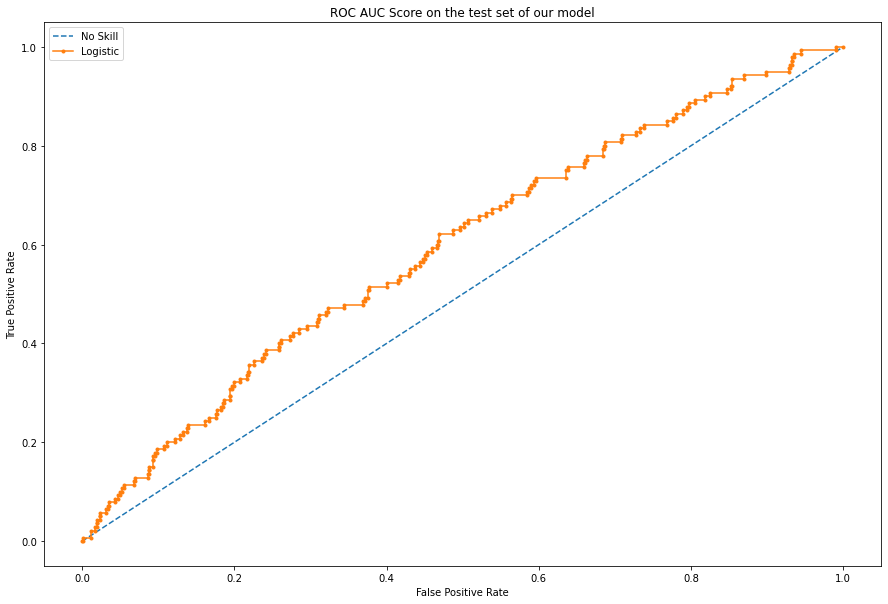

In [53]:
ns_probs = [0 for _ in range(len(y_test))]
proba = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [54]:
bestparamsLGB = {"max_bin" : [20,30, 40], "learning_rate" : [0.05], "num_iterations" : [500,750, 1000], \
             "num_leaves": [6,8, 10], "bagging_fraction" : [0,5, 0,7, 0.9], "feature_fraction": [0.35], "min_data_in_leaf" : [25], \
             "min_sum_hessian_in_leaf" : [10,25, 40], "max_depth" : [5,7,9]}

In [55]:
clf = GridSearchCV(lightgbm.LGBMClassifier(), param_grid = bestparamsLGB, n_jobs=-1, scoring = 'roc_auc',cv=3, verbose = 2)
clf.fit(X=X_train, y=y_train)
LGBModel = clf.best_estimator_

Fitting 3 folds for each of 1215 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  2.9min finished
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [56]:
clf.best_estimator_

LGBMClassifier(bagging_fraction=0.9, feature_fraction=0.35, learning_rate=0.05,
               max_bin=20, max_depth=5, min_data_in_leaf=25,
               min_sum_hessian_in_leaf=10, num_iterations=500, num_leaves=6)

In [57]:
crossval_scores = cross_val_score(LGBModel, X_train,y_train, scoring='roc_auc', cv=10)
crossval_scores.mean()

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


0.7148234151086515

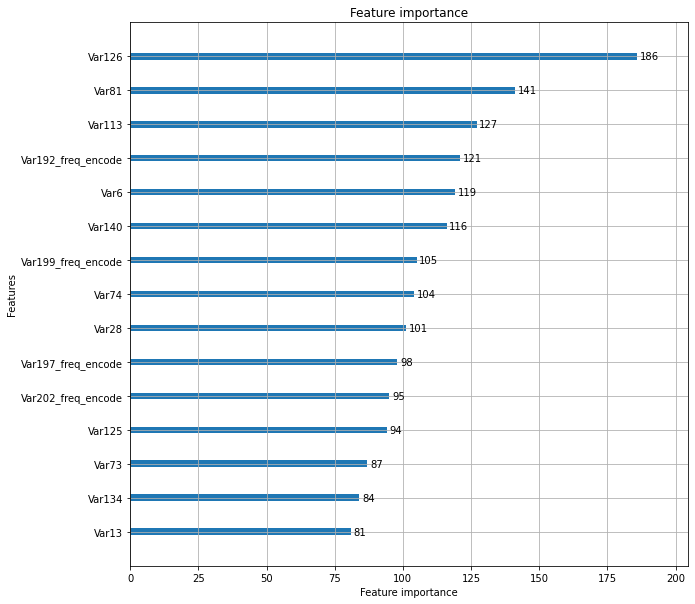

In [58]:
lightgbm.plot_importance(LGBModel, max_num_features = 15, figsize = (10,10))

No Skill: ROC AUC=0.500
LGBM: ROC AUC=0.716


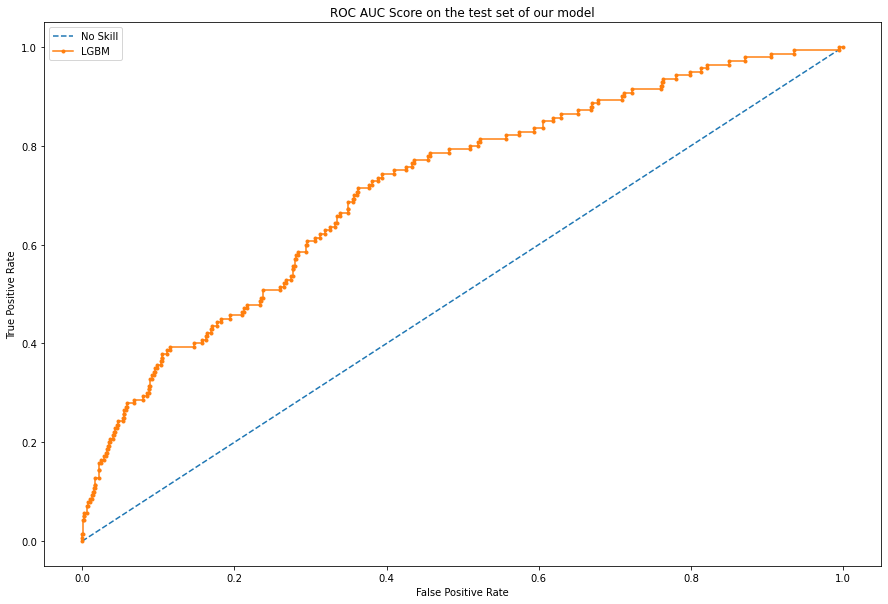

In [59]:
ns_probs = [0 for _ in range(len(y_test))]
proba = LGBModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LGBM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [60]:
bestparamsRF = {'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,500,1000]}

In [61]:
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,50,100]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 100]}

In [62]:
clf = GridSearchCV(RandomForestClassifier(), param_grid = bestparamsRF, n_jobs=-1, scoring = 'roc_auc',cv=3, verbose = 2)
clf.fit(X=X_train, y=y_train)
rf_model = clf.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.0min finished


In [63]:
clf.best_estimator_

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [64]:
crossval_scores = cross_val_score(rf_model, X_train, y_train, scoring='roc_auc', cv=10)
crossval_scores.mean()

0.6979054061781538

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.722


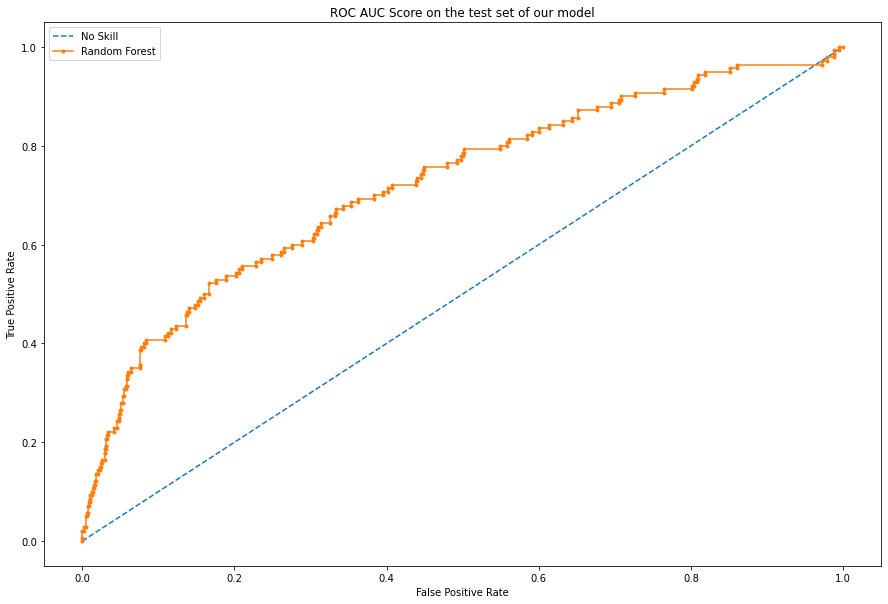

In [65]:
ns_probs = [0 for _ in range(len(y_test))]
proba = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [67]:
# define model
lda = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd','lsqr', 'eigen']
# define search
clf = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
clf.fit(X=X_train, y=y_train)
lda_model = clf.best_estimator_
# summarize
print('Mean Accuracy: %.3f' % clf.best_score_)
print('Config: %s' % clf.best_params_)

Mean Accuracy: 0.923
Config: {'solver': 'lsqr'}


In [68]:
crossval_scores = cross_val_score(lda_model, X_train, y_train, scoring='roc_auc', cv=10)
crossval_scores.mean()

0.6991871146690505

No Skill: ROC AUC=0.500
LDA: ROC AUC=0.742


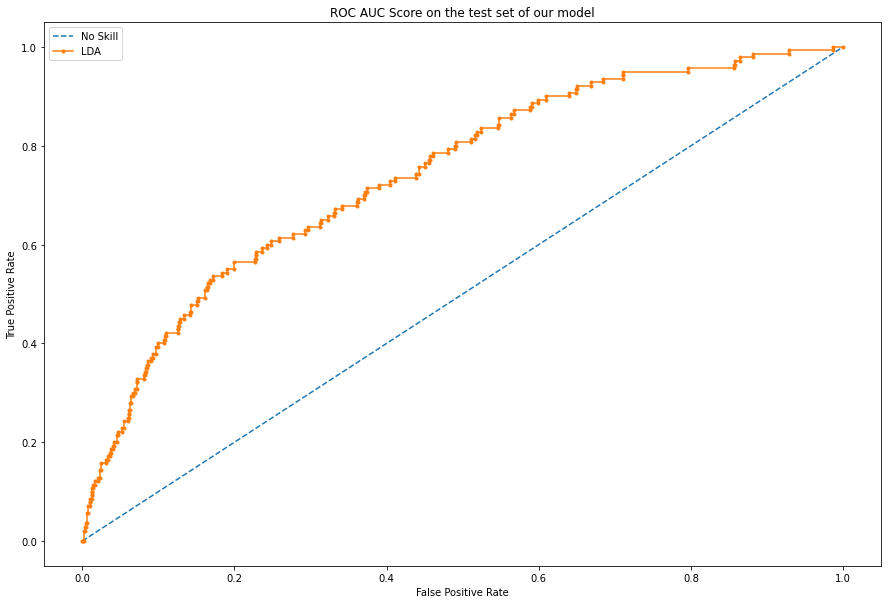

In [69]:
ns_probs = [0 for _ in range(len(y_test))]
proba = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LDA: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LDA')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [70]:
bestparamGB = {}
              #'min_samples_leaf' : [3]}

In [ ]:
clf = GridSearchCV(GradientBoostingClassifier(n_estimators=47, subsample=0.92, min_samples_leaf = 3), param_grid = bestparamGB, n_jobs=-1, scoring = 'roc_auc',cv=10, verbose = 2)
clf.fit(X=X_train, y=y_train)
gb_model = clf.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
# grid_param = {'n_estimators' : list(range(30, 55, 1)),
#                'subsample' : [0.7,0.75,0.8,0.85,0.90]}

In [ ]:
# Bayes = BayesSearchCV(GradientBoostingClassifier() , grid_param , n_iter=30 , random_state=14)
# Bayes.fit(X_train,y_train)

# #best parameter combination
# Bayes.best_params_

# #score achieved with best parameter combination
# Bayes.best_score_

# #all combinations of hyperparameters
# Bayes.cv_results_['params']

In [ ]:
gb_model = clf.best_estimator_

In [ ]:
# Bayes.best_estimator_

In [ ]:
clf.best_estimator_

In [ ]:
crossval_scores = cross_val_score(gb_model, X_train, y_train, scoring='roc_auc', cv=5)
crossval_scores.mean()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
proba = gb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gradient Boosting')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [ ]:
xgb = XGBClassifier()

xgb_model = xgb.fit(X_train, y_train)

In [ ]:
crossval_scores = cross_val_score(xgb_model, X_train, y_train, scoring='roc_auc', cv=10)
crossval_scores.mean()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
proba = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGradient Boosting: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGradient Boosting')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [ ]:
bestparamsBag = {}

In [ ]:
clf = GridSearchCV(BaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators = 50)), param_grid = bestparamsBag, n_jobs=-1, scoring = 'roc_auc',cv=3, verbose = 2)
clf.fit(X=X_train, y=y_train)
bag_model = clf.best_estimator_

In [ ]:
crossval_scores = cross_val_score(bag_model, X_train, y_train, scoring='roc_auc', cv=5)
crossval_scores.mean()

In [ ]:
clf.best_estimator_

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
proba = bag_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bagging: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Bagging')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [ ]:
estimators = [('rf', RandomForestClassifier()),
              ('knn', KNeighborsClassifier())]
clf = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier())

In [ ]:
stack_model = clf.fit(X=X_train, y=y_train)

In [ ]:
crossval_scores = cross_val_score(stack_model, X_train, y_train, scoring='roc_auc', cv=5, verbose = 2)
crossval_scores.mean()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
proba = stack_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bagging: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Bagging')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [ ]:
params = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]

In [ ]:
clf = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid = params, n_jobs=-1, scoring = 'roc_auc',cv=3, verbose = 2)

qda = clf.fit(X_train, y_train)

qda_model = clf.best_estimator_

In [ ]:
crossval_scores = cross_val_score(qda, X_train, y_train, scoring='roc_auc', cv=5)
crossval_scores.mean()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
proba = qda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('QDA: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='QDA')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

In [ ]:
stop

In [ ]:
predictions = gb_model.predict_proba(test[lgb_feature])

test["churn"] = predictions[:,1]

In [ ]:
final = test[['cust_id','churn']]

In [ ]:
final.to_csv("SML_Kaggle_Comp_TH_65.csv", index = False)

In [ ]:
final